In [ ]:
Lectures 8-10: Stratigraphic time

In [3]:
nb_list = !jupyter notebook list
server = [l for l in nb_list if 'EOS423' in l][0].split(' :: ')[0]
prefix = server.split('?')[0]
token = server.split('?')[1]
notebook = 'Lectures10-13_StratigraphicTime.ipynb'
url = prefix+'notebooks/'+notebook+'?'+token
!decktape -s '1920x1080' rise $url PDF_Slides/2023/Lectures10-13_StratigraphicTime.pdf

Loading page http://localhost:8889/notebooks/Lectures10-13_StratigraphicTime.ipynb?token=49f7dc8d45ba1a53029e9ddaeba6510c3494670598df50e7 ...
actions jupyter-notebook:find-and-replace does not exist, still binding it in case it will be defined later...
load_extensions {
  '0': 'nbextensions_configurator/config_menu/main',
  '1': 'contrib_nbextensions_help_item/main',
  '2': 'rise/main',
  '3': 'jupyter-js-widgets/extension',
  '4': 'jupyter-black-master/jupyter-black',
  '5': 'toc2/main',
  '6': 'hide_code/hide_code',
  '7': 'hide_input/main',
  '8': 'codefolding/main',
  '9': 'splitcell/splitcell'
}
Loaded moment locale en-gb
Failed to load resource: the server responded with a status of 404 (Not Found)
HTML Sanitizer div.style changed {
  change: 'changed',
  tagName: 'div',
  attribName: 'style',
  oldValue: 'background: url(images/time/chronostrat.png) 50% 50% no-repeat;\n' +
    '  width: 100vw;\n' +
    '  height: 30vh; background-size: 100%;',
  newValue: 'background: url("image

Session: kernel_created (1921491f-3224-4707-b150-04bdb1fe2057)
Starting WebSockets: ws://localhost:8889/api/kernels/7f98eb28-a3a7-416d-b6ec-0694a0c7bfcb
Loading extension: nbextensions_configurator/config_menu/main
Failed to load extension: [ 'nbextensions/hide_code/hide_code' ] {
  requireType: 'scripterror',
  requireModules: [ 'nbextensions/hide_code/hide_code' ],
  originalError: { isTrusted: true }
}
Loading extension: splitcell/splitcell
Loading extension: contrib_nbextensions_help_item/main
Loading extension: rise/main
Loading extension: hide_input/main
Kernel: kernel_connected (7f98eb28-a3a7-416d-b6ec-0694a0c7bfcb)
Loading extension: jupyter-js-widgets/extension
Failed to load resource: the server responded with a status of 404 (Not Found)
Widgets are not available.  Please install widgetsnbextension or ipywidgets 4.0
Loading extension: codefolding/main
Loading extension: jupyter-black-master/jupyter-black
Loading extension: toc2/main
[toc2] Notebook fully loaded -- toc2 initia

<center><div style="background: url(images/time/chronostrat.png) 50% 50% no-repeat;
  width: 100vw;
  height: 30vh; background-size: 100%;">
</div></center>

# Lecture 10-13: Time in Stratigraphic Sequences

<div style='font-size:25px'>  
   
1. Gross vs. net fluxes
    1. an illustrative example
    1. diastems and hiatuses 
    1. how to build a rock record    
1. The concept of correlation
    1. Chronostratigraphy (Wheeler diagrams)
1. Time in the rock record
    1. Sadler effect
</div>

- value for respiration comes from (0.1 Pg C / yr) * (0.2) with a CH2O stoichiometry
- assume any difference between it and GPP is lost to respiration
- likely still an overestimate for net O2 production - why?
- not the only way to lose O2, can also oxidize Fe2+ and S2-

# Gross vs. Net fluxes
<center>
\begin{align}
CO_2 + H_20 + \mathrm{energy} \underset{\color{red}{respiration}}{\stackrel{\color{blue}{photosynthesis}}{\rightleftharpoons}} CH_2O + O_2\\
\mathrm{Net~flux~(O_2~into~atm) = \color{blue}{photosynthesis} - \color{red}{respiration}}
\end{align}
</center>

<center>
    <div style='height:5vh;'>
	    <p>
    </div>
</center>


<center>
\begin{align}
\mathrm{sediment} + \mathrm{movement} \underset{\color{red}{erosion}}{\stackrel{\color{blue}{deposition}}{\rightleftharpoons}} \mathrm{topography}\\
\mathrm{Net~topography = \color{blue}{deposition} - \color{red}{erosion}}
\end{align}
</center>

<center>
    <div style='height:25vh;'>
	    <p>
    </div>
both depend on rate!!
</center>


- the universe does not bend towards more O2 or more rock!
- if we wait for some period of time, perhaps we would lose all our rock, or all our O2

# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.001.jpeg" style='height:60vh'>
</center>

# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.002.jpeg" style='height:60vh'>
</center>

# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.003.jpeg" style='height:60vh'>
</center>

# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.004.jpeg" style='height:60vh'>
</center>

# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.005.jpeg" style='height:60vh'>
</center>

# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.006.jpeg" style='height:60vh'>
</center>

# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.007.jpeg" style='height:60vh'>
</center>


# Gross and net sedimentation
<center>
	    <img src="images/time/diastems/diastems.007.jpeg" style='height:40vh'>
</center>

**net sedimentary record** is full of **gaps:** both **erosive surfaces** and **hiatuses**.

 <span style='color:dodgerblue'>**How much time is represented by sedimentary rock?**</span>

- unless we can recognize these surfaces, net sedimentation looks pretty continuous
- in fact, only 25% of the elapsed time is represented as ROCK
- remainder is contained in the gaps!

# How to build the net rock record


In [4]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

#empty lists for data
model_topo=[]

#open the data file
with open("../Assignments/Assignment_1/Assignment_1p3/data/model_results.csv","r") as fid:
    data = csv.reader(fid, delimiter=",")

    #reads the data in line-by-line
    for row in data:
        model_topo.append([float(r) for r in row[1:]])

#convert to list of numpy arrays
model_topo=[np.array(t) for t in model_topo]

#define as change from inital conditions 
model_topo=[t-model_topo[0] for t in model_topo]

- now lets see how we can build the net rock record from our diffusion model outputs - this is something that is needed for Assignment 1.3, question 2
- importing model topography (measured at 1000 grid points) through time (201 timesteps)
- first defining topography as DIFFERENCE in topography between end and beginning of model

<center>
    <div style='height:10vh;'>
	    <p>
    </div>
</center>

# How to build the net rock record

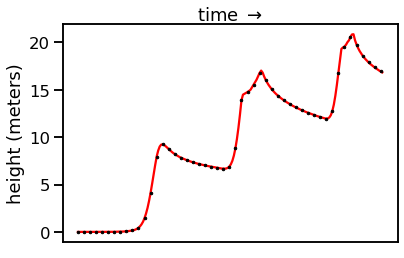

In [5]:
#pull topographic evolution from one spot in the basin
section=[t[454] for t in model_topo]

plt.plot(section,'-',color='r')
plt.plot(np.arange(len(section))[0::4],section[0::4],'.',markersize=5,color='k')

plt.gca().set_xticks([])
plt.gca().set_xlabel(r'time $\rightarrow$')
plt.gca().set_ylabel('height (meters)')
plt.gca().xaxis.set_label_position('top')  

- so let's plot up topographic evolution for one grid point (in this case, its 4.54 kilometers into our basin)
- can people spot the periods of erosion and/or hiatuses? Mark them up!
- so how do we go from this trajectory to the net rock record? has anyone made progress on this question?
- **I will show one way, might not be the best way**
- helpful to work BACKWARDS - start at the end, and burrow your way to the beginning
- at each black dot, look backwards in time - has topography INCREASED or DECREASED?


<center>
    <div style='height:40vh;'>
	    <p>
    </div>
</center>

# How to build the net rock record

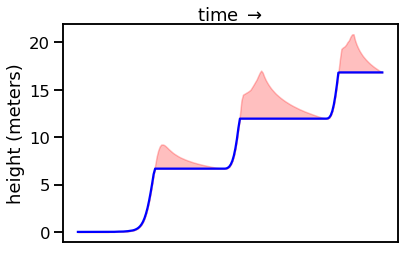

In [3]:
net=np.flipud(section) #flip this stratigraphy upside down to examine youngest to oldest
for i,s in enumerate(net): #count through time slices starting at the youngest
    if i!=len(net)-1: #if we're not at the end
        #look "down section" - was this layer eroded?
        # --> if height had decreased, then yes
        if s<net[i+1]: #s is height of current timeslice, net[i+1] is heigh of previous timeslice
            net[i+1]=s #create new record of net sedimentation
#make stratigraphy younging upwards again
net=np.flipud(net)
plt.plot(net,color='b')
plt.fill_between(np.arange(len(section)),section,net,color='r',alpha=0.25)
plt.gca().set_xticks([])
plt.gca().set_xlabel(r'time $\rightarrow$')
plt.gca().set_ylabel('height (meters)')
plt.gca().xaxis.set_label_position('top') 

- this is exactly what this code is doing for this particular section location
- plot it up, and we can see that we've identified the period of erosion

<center>
    <div style='height:20vh;'>
	    <p>
    </div>
</center>

# How to build the net rock record
<center>
    <div style='width:100wh;'>
	    <img src="images/time/lithostrat_simple.png" style='width:100wh'>
    </div>
</center>

- so I have applied that same algorithm throughout my model basin, and this allows me to make strat sections like this
- can also mark EROSIVE SURFACES and NON-DEPOSITION SURFACES (which are sometimes called hardgrounds, especially when dealing with carbonate lithologies)
- each erosive surface is marked by how much sediment was created and then later destroyed
- this is the "field geologists" view of things.
- Imagine we had a slice through our model basin. Finding its base (datum = 0m), and measuring up. Making notes about sedimentary features and structures to make some inference about water depth (wider boxes = shallower) and erosion surfaces / hiatuses

# Chronostratigraphy and Wheeler Diagrams
<center>
    <div style='width:100wh;'>
	    <img src="images/time/chronostrat_simple.png" style='width:100wh'>
    </div>
</center>

- Now, let's take a "time" view of these stratigraphic column
- this view is sometimes called a chronostratigraphic chart, or a Wheeler diagram
- y-axis is time (top = end of model run)
- x-axis is showing presence / absense of rock at that time. Height is NOT thickness!
- white space is NON-DEPOSITION
- purple space is when EROSION was occuring, gobbling up previously deposited sediment
- **can you make some observations about sedimentation occured in this basin?**
- gappiest at the proximal and distal ends - FAR FROM SED SOURCE
- when sedimentaiton occurs, most complete in the middle portion
- also most erosive - LARGE GRADIENTS
- **so what would a line of correlation look like on a Wheeler diagram** CORRELATION = EQUAL TIME, SO FLAT

# Chronostratigraphy and Wheeler Diagrams
<center>
    <div style='width:100wh;'>
	    <img src="images/time/chronostrat_simple_corr.png" style='width:100wh'>
    </div>
</center>

- **would it be flat in a lithostratigraphic column?**
- **make predictions of where this line will sit in the end columns vs. the middle columns**

# Correlating in lithostratigraphic space
<center>
    <div style='width:100wh;'>
	    <img src="images/time/lithostrat_simple_corr.png" style='width:100wh'>
    </div>
</center>

- **so what is going on with this surface?**
- **what do you think is going on at this level, with ~5 m deep lithofacies ontop of ~0.1 m deep facies?**
- **is subtidal depo going to be SYNCHRONOUS across these columns?**
- time transgressive, but still telling you something about the basin (i.e., there was a transgression, felt across at least part of the basin, just felt at different times)


# Correlating in lithostratigraphic space
<center>
    <div style='width:100wh;'>
	    <img src="images/time/lithostrat_simple_corr2.png" style='width:100wh'>
    </div>
</center>

# Correlating works best with many sections!
<center>
    <div style='width:100wh;'>
	    <img src="images/time/chronostrat_intense.png" style='width:100wh'>
    </div>
</center>

- these are fun to just stare at - you really learn a lot
- below the 780 line, you can see the transgression coming landward, and see that it is time transgressive

# Correlating works best with many sections!
<center>
    <div style='width:100wh;'>
	    <img src="images/time/lithostrat_intense.png" style='width:100wh'>
    </div>
</center>

- this one is especially fun with a beer in hand

# Time in the rock record
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sadler/sadler.001.jpeg" style='width:100wh'>
    </div>
</center>

- okay, so let's end with a very big picture look at how time is distributed in sedimentary records
- we can get at this question by assessing how well can we tell time, just by looking at thickness?
- do this in a "past is the key to the present" way 
    - by measuring sedimentation rates in analagous settings, and applying them 

# Time in the rock record
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sadler/sadler.002.jpeg" style='width:100wh'>
    </div>
</center>

- but the true answer is very different, as told by dated ash layers at the top and bottom of this succession
- not a little wrong, but wrong by three orders of magnitude

# Time in the rock record
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sadler/sadler.003.jpeg" style='width:100wh'>
    </div>
</center>

# Time in the rock record
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sadler/sadler.005.jpeg" style='width:100wh'>
    </div>
</center>

- can show that prediction through a data compilation of accumulation rates, taken from a range of Cenozoic-aged depositional environments
- in black are the sediment trap measurements
- not linear relationship, but a power law relationship Y = kX$^{n}$
- a straight line on a log-log plot: log$_{10}$(Y) = log$_{10}$(k) + nlog$_{10}$(X)

# Time in the rock record
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sadler/sadler.006.jpeg" style='width:100wh'>
    </div>
</center>

- add some deep time examples
- **why are they all at the bottom right corner?**

# Why is this happening?
<center>
    <div style='width:100wh;'>
	    <img src="images/time/diastems/diastems.007.jpeg" style='width:100wh'>
    </div>
</center>

- how could you get slow accumulation rates, and fast accumulation rates?

# Time in our rock record
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sadler_in_model2.png" style='width:100wh'>
    </div>
</center>

- we can actually analyze our model outputs, and find the Sadler effect
- a great demonstrate that our model is doing something real!

# Why is this happening?
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sed_rates_strat1.png" style='width:100wh'>
    </div>
</center>

<center>
    <div style='height:30vh;'>
	    <p>
    </div>
</center>


# Why is this happening?
<center>
    <div style='width:100wh;'>
	    <img src="images/time/sed_rates_strat2.png" style='width:100wh'>
    </div>
</center>

